In [1]:
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import warnings
pd.set_option('display.max_columns',None)

In [2]:
with open('data/full_data.pkl','rb') as f:
    df = pkl.load(f)
dfr = pd.read_csv('data/ridership.csv')

In [3]:
df.drop(['all_delays','delayed_stations','between_stations','date'],axis=1,inplace=True)

In [11]:
features_df = df[['bronx', 'brooklyn', 'manhattan', 'queens', 'direction_bronx', 'direction_brooklyn', 'direction_manhattan',
                  'direction_queens', 'direction_both', 'direction_north', 'direction_south', 'passenger_disruption',
                  'station_integrity_disruption', 'mechanical_and_track_disruption', 'train_disruption', 'weather_disruption',
                  'signal_disruption', 'switch_disruption', 'mon', 'tue', 'wed', 'th', 'fri', 'weekend', 'holiday', 'rush_hour',
                   'max_temp', 'avg_temp', 'min_temp', 'avg_wind_spd', 'fastest_wind_directions', 'fastest_wind_spd', 'major_conditions',
                  'minor_conditions', 'neutral_conditions', 'clear_conditions', 'prcp', 'snowfall', 'snowfall_depth']]

In [13]:
delays_df = df[['delayed_div_a','delayed_div_b','bronx', 'brooklyn', 'manhattan', 'queens', 'direction_bronx',
                'direction_brooklyn', 'direction_manhattan','direction_queens', 'direction_both', 'direction_north',
                'direction_south', 'passenger_disruption','station_integrity_disruption', 'mechanical_and_track_disruption',
                'train_disruption', 'weather_disruption','signal_disruption', 'switch_disruption', 'mon', 'tue', 'wed',
                'th', 'fri', 'weekend', 'holiday', 'rush_hour','max_temp', 'avg_temp', 'min_temp', 'avg_wind_spd', 
                'fastest_wind_directions', 'fastest_wind_spd', 'major_conditions','minor_conditions', 'neutral_conditions',
                'clear_conditions', 'prcp', 'snowfall', 'snowfall_depth']]

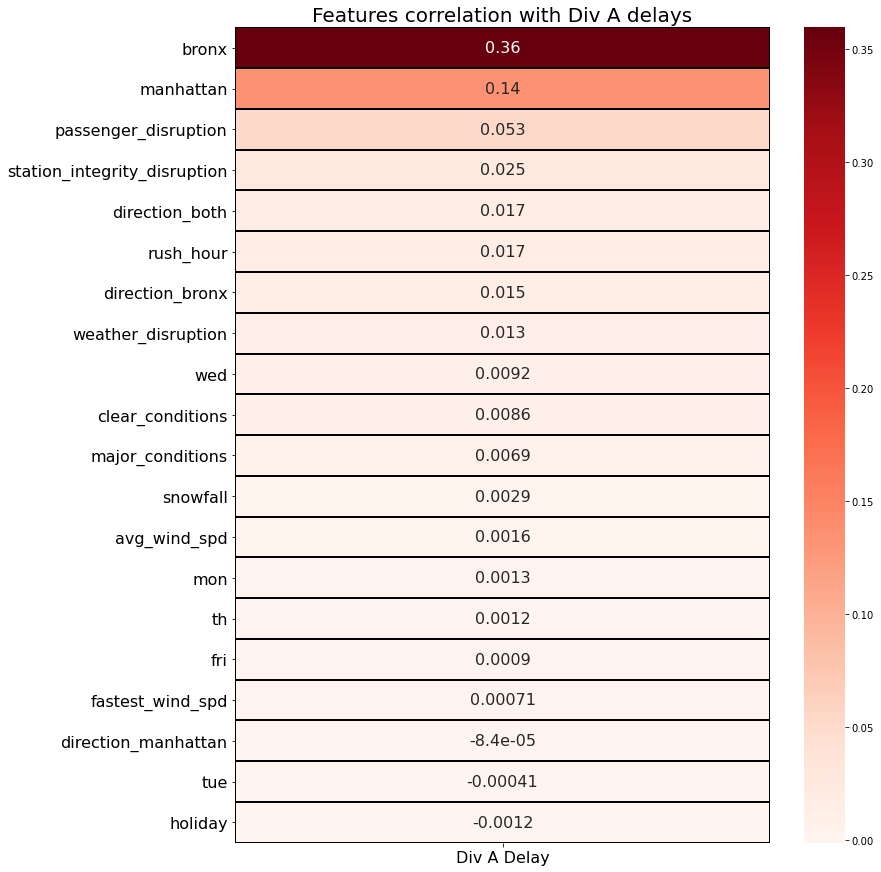

In [19]:
corr = delays_df.corr().drop(['delayed_div_a','delayed_div_b'])
x=corr[['delayed_div_a']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_div_a'],ascending=0)[:20],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           #yticklabels=y_labels,
           xticklabels=['Div A Delay']);
ax.set_title('Features correlation with Div A delays',size=20)
ax.tick_params(labelsize=16)

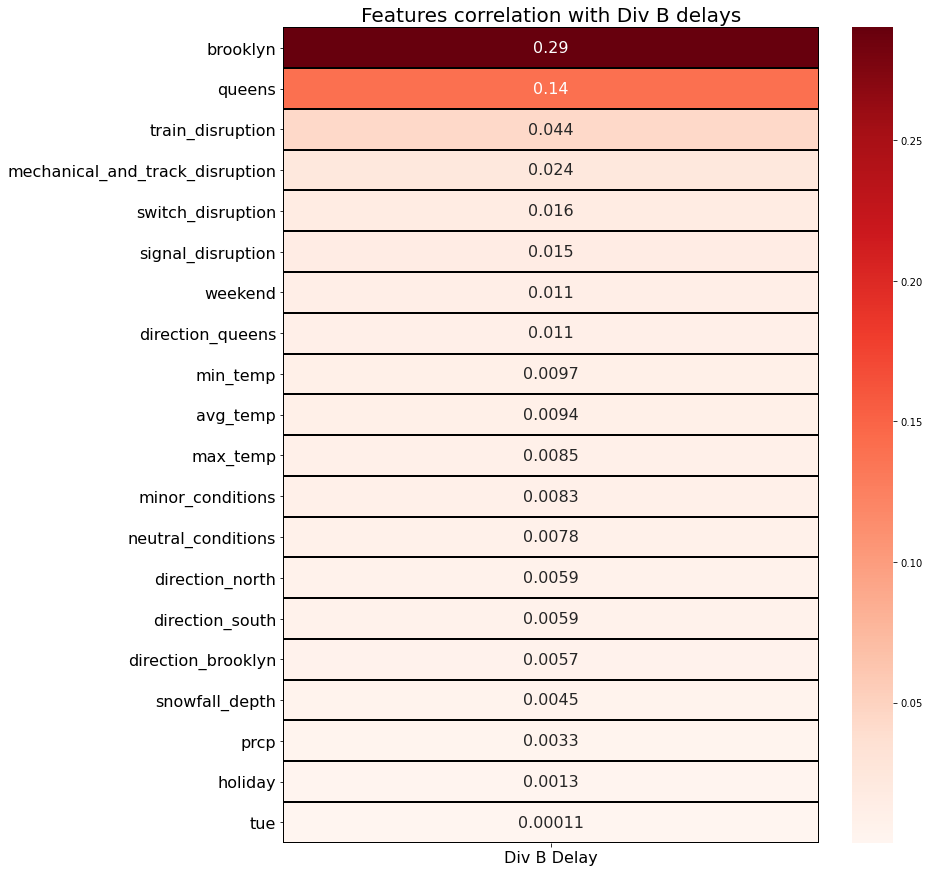

In [18]:
corr = delays_df.corr().drop(['delayed_div_a','delayed_div_b'])
x=corr[['delayed_div_b']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_div_b'],ascending=0)[:20],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           #yticklabels=y_labels,
           xticklabels=['Div B Delay']);
ax.set_title('Features correlation with Div B delays',size=20)
ax.tick_params(labelsize=16)

In [21]:
causes = df[['delayed_div_a','delayed_div_b','passenger_disruption','station_integrity_disruption',
             'mechanical_and_track_disruption','train_disruption', 'weather_disruption','signal_disruption', 'switch_disruption']]
div_a_causes = causes.loc[causes['delayed_div_a']==1]
div_a_causes.drop(['delayed_div_a','delayed_div_b'],axis=1,inplace=True)
div_b_causes = causes.loc[causes['delayed_div_b']==1]
div_b_causes.drop(['delayed_div_a','delayed_div_b'],axis=1,inplace=True)

In [27]:
div_a_causes = div_a_causes.reindex(columns=['mechanical_and_track_disruption','passenger_disruption','weather_disruption',
                                             'signal_disruption','train_disruption','station_integrity_disruption',
                                             'switch_disruption'])

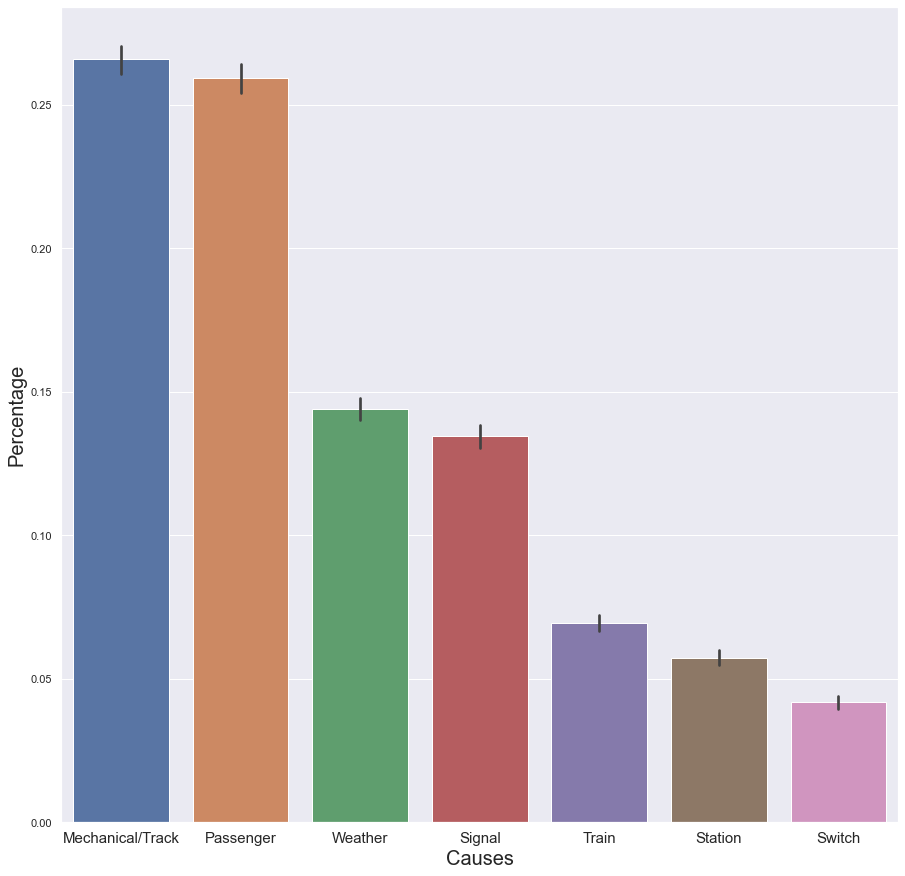

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=div_a_causes)
ax.set_xticklabels(['Mechanical/Track','Passenger','Weather','Signal','Train',
                   'Station','Switch'],fontsize=15)
ax.set_xlabel('Causes',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

In [32]:
div_b_causes = div_b_causes.reindex(columns=['mechanical_and_track_disruption','passenger_disruption','signal_disruption',
                                             'weather_disruption','train_disruption','switch_disruption',
                                             'station_integrity_disruption'])

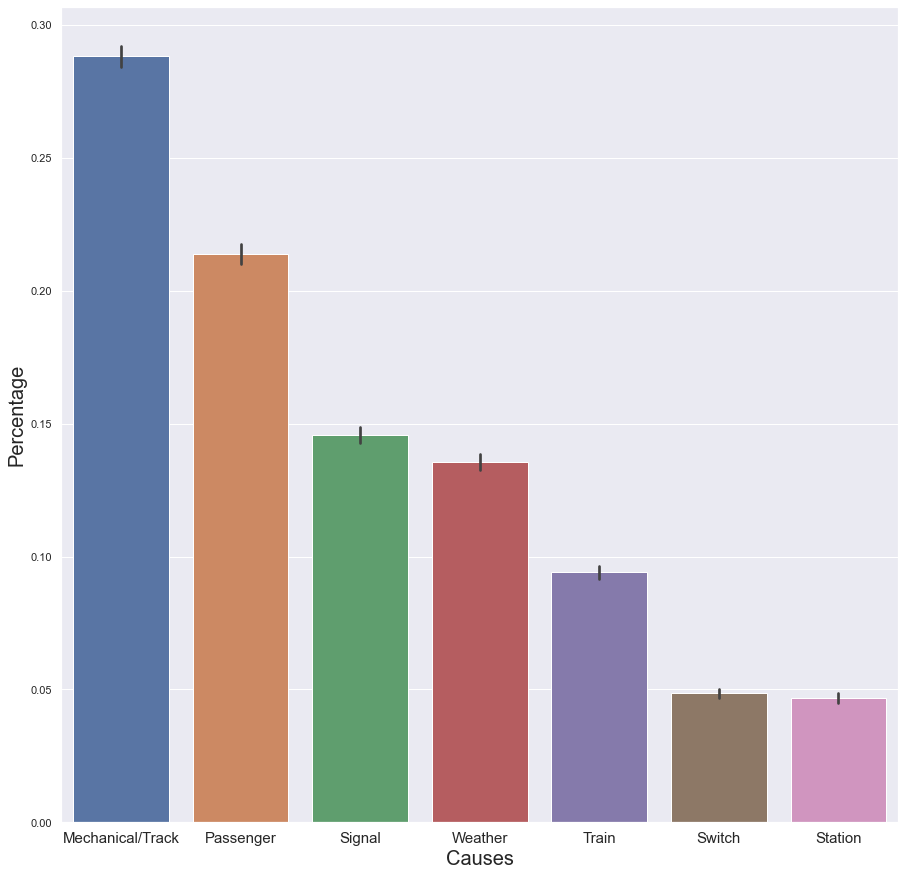

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=div_b_causes)
ax.set_xticklabels(['Mechanical/Track','Passenger','Signal','Weather','Train',
                   'Switch','Station'],fontsize=15)
ax.set_xlabel('Causes',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

In [4]:
dfr.drop('Unnamed: 0',axis=1,inplace=True)

In [44]:
dfr['median'] = dfr[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top = dfr.sort_values('mean',ascending=False)[:10]
top = top[['station','mean']]

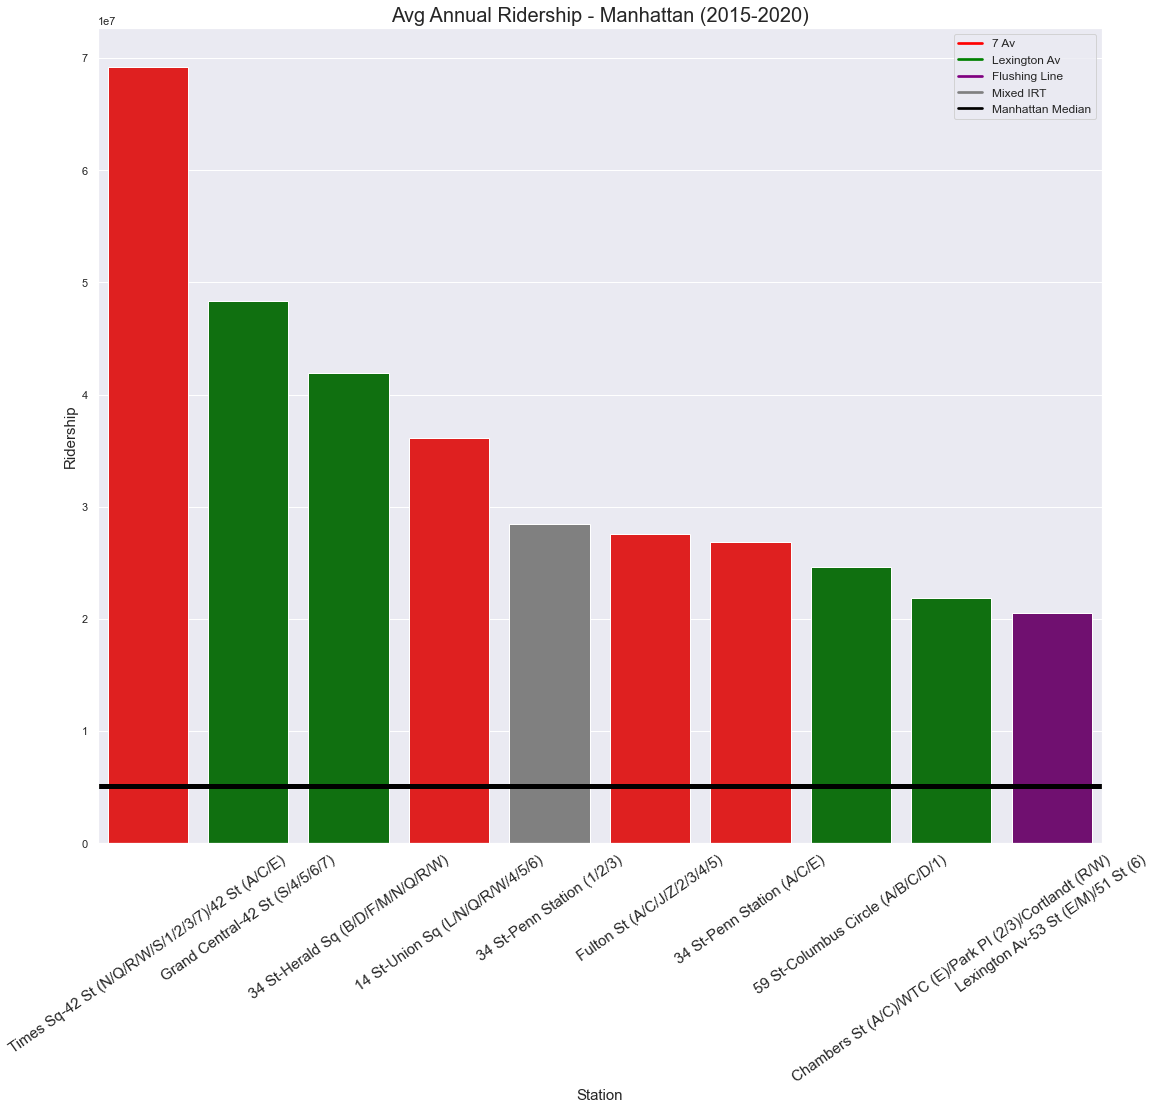

In [40]:
fig, ax = plt.subplots(figsize=(18, 15))

x = top['station']
y = top['mean']


sns.set_theme()
sns.barplot(x = x,y = y,palette=['red','green','green','red','gray','red','red','green','green','purple']).axhline(
manh_df['median'].median(),linewidth=5,color='black')
ax.set_xticklabels(labels = x,fontsize=15,rotation=35)
ax.set_title('Avg Annual Ridership - Manhattan (2015-2020)',fontsize=20)
ax.set_xlabel('Station',fontsize=15)
ax.set_ylabel('Ridership',fontsize=15)
leg = ax.legend(labels=['7 Av','Lexington Av','Flushing Line','Mixed IRT','Manhattan Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('purple')
leg.legendHandles[3].set_color('gray')
leg.legendHandles[4].set_color('black')
plt.show();